# Import Libraries & Set Up
---

In [1]:
import warnings
import logging
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import bnlearn as bn
from pgmpy.global_vars import logger
from utils import *  # Helper functions for Gaussian cross-validation

warnings.filterwarnings('ignore')
logger.setLevel(logging.ERROR)
logging.getLogger('seaborn').setLevel(logging.ERROR)
logging.getLogger('matplotlib').setLevel(logging.ERROR)
logging.getLogger('pandas').setLevel(logging.ERROR)

palette = ['#800080', '#8A2BE2', '#FF69B4', '#DA70D6', '#9370DB', '#DDA0DD', '#BA55D3']
gradient_palette = sns.light_palette('#620080', as_cmap=True)
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=palette)
sns.set_theme(style="whitegrid", palette=palette)

# Dementia
---

In [2]:
dementia_df = pd.read_csv('data/dementia_data_processed.csv')

## Learning Structure & Parameters with Cross-Validation
---

### Cross-Validation
---

In [3]:
evaluation = {}

#### RBF Kernel
---

In [4]:
eval_rbf = gaussian_process_cross_validation(dementia_df, 'Group', kernel_type='rbf')


Fold 1/5

Fold 2/5

Fold 3/5

Fold 4/5

Fold 5/5


In [5]:
evaluation['RBF Kernel'] = eval_rbf

#### Matern Kernel
---

In [6]:
eval_matern = gaussian_process_cross_validation(dementia_df, 'Group', kernel_type='matern')


Fold 1/5

Fold 2/5

Fold 3/5

Fold 4/5

Fold 5/5


In [7]:
evaluation['Matern Kernel'] = eval_matern

### Evaluation
---

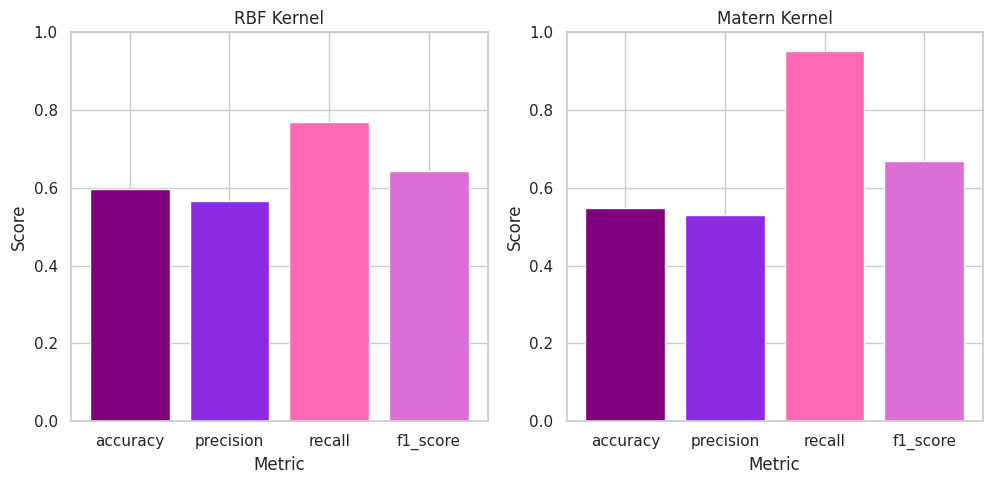

In [8]:
plot_metrics_from_evaluation(evaluation)

In [9]:
display_evaluation_results(evaluation)


RBF Kernel:
  Metrics:
    Classification:
      Accuracy: 59.57%
      Precision: 56.67%
      Recall: 77.02%
      F1_score: 64.25%
    Roc_auc: 0.5830920677987577
    Brier_score: 0.23579622421712143
    Log_loss: 0.6630751913823596
  Time Taken: 8.20 seconds
  Confusion Matrix: [ 85 119]
                    [ 46 158]

Matern Kernel:
  Metrics:
    Classification:
      Accuracy: 54.93%
      Precision: 53.02%
      Recall: 95.13%
      F1_score: 66.87%
    Roc_auc: 0.560033637576096
    Brier_score: 0.23613993787692306
    Log_loss: 0.6637743718782834
  Time Taken: 11.86 seconds
  Confusion Matrix: [ 30 174]
                    [ 10 194]


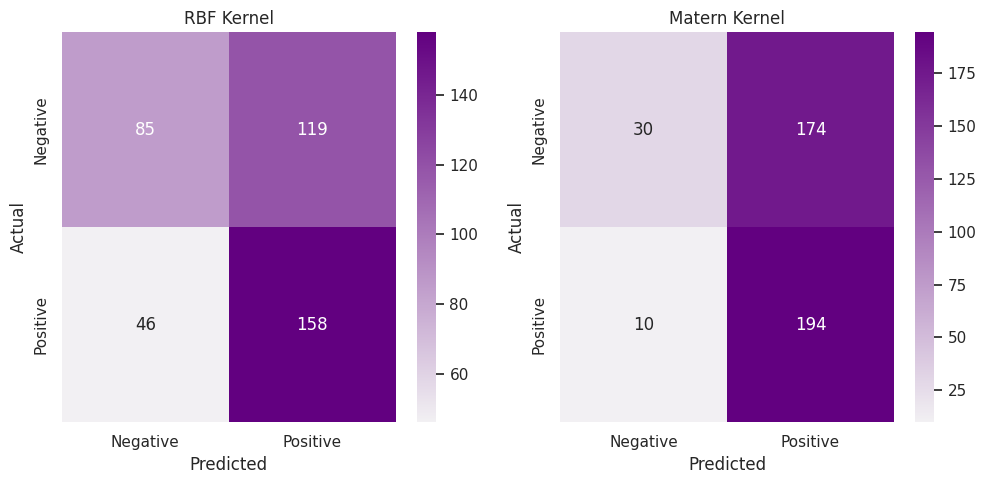

In [10]:
plot_confusion_matrices_from_evaluation(evaluation, cmap=gradient_palette)

# Parkinson's Disease
---

In [11]:
parkinsons_df = pd.read_csv('data/parkinsons_data_processed.csv')

## Learning Structure & Parameters with Cross-Validation
---

### Cross-Validation
---

In [12]:
evaluation = {}

#### RBF Kernel
---

In [13]:
eval_rbf = gaussian_process_cross_validation(parkinsons_df, 'Status', kernel_type='rbf')


Fold 1/5

Fold 2/5

Fold 3/5

Fold 4/5

Fold 5/5
Cannot calculate log loss for this fold: y_true contains only one label (0). Please provide the true labels explicitly through the labels argument.


In [14]:
evaluation['RBF Kernel'] = eval_rbf

#### Matern Kernel
---

In [15]:
eval_matern = gaussian_process_cross_validation(parkinsons_df, 'Status', kernel_type='matern')


Fold 1/5

Fold 2/5

Fold 3/5

Fold 4/5

Fold 5/5
Cannot calculate log loss for this fold: y_true contains only one label (0). Please provide the true labels explicitly through the labels argument.


In [16]:
evaluation['Matern Kernel'] = eval_matern

### Evaluation
---

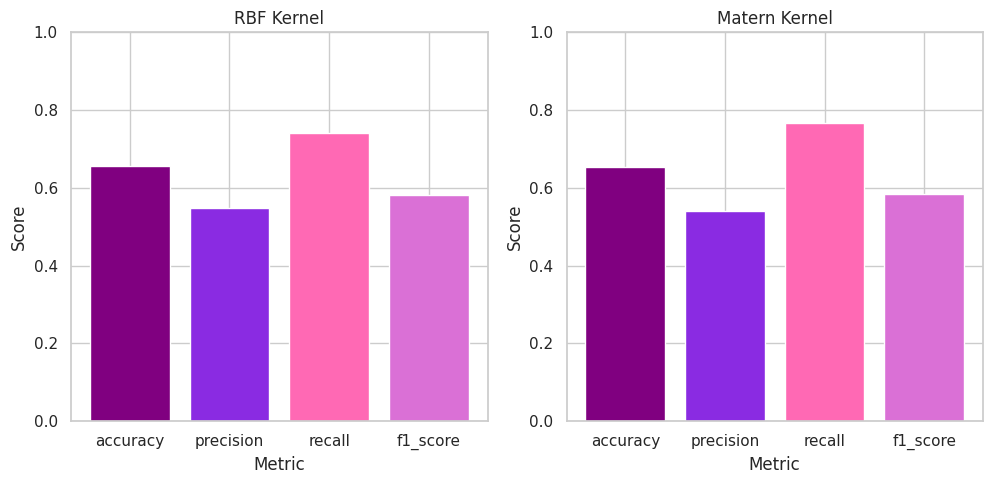

In [17]:
plot_metrics_from_evaluation(evaluation)

In [18]:
display_evaluation_results(evaluation)


RBF Kernel:
  Metrics:
    Classification:
      Accuracy: 65.56%
      Precision: 54.87%
      Recall: 74.11%
      F1_score: 58.25%
    Roc_auc: 0.690762746783893
    Brier_score: 0.216183969337576
    Log_loss: 0.5963920072672801
  Time Taken: 4.69 seconds
  Confusion Matrix: [60 87]
                    [ 14 133]

Matern Kernel:
  Metrics:
    Classification:
      Accuracy: 65.23%
      Precision: 53.91%
      Recall: 76.60%
      F1_score: 58.43%
    Roc_auc: 0.6898458722081549
    Brier_score: 0.20006714988509283
    Log_loss: 0.5497855220175166
  Time Taken: 6.00 seconds
  Confusion Matrix: [53 94]
                    [  8 139]


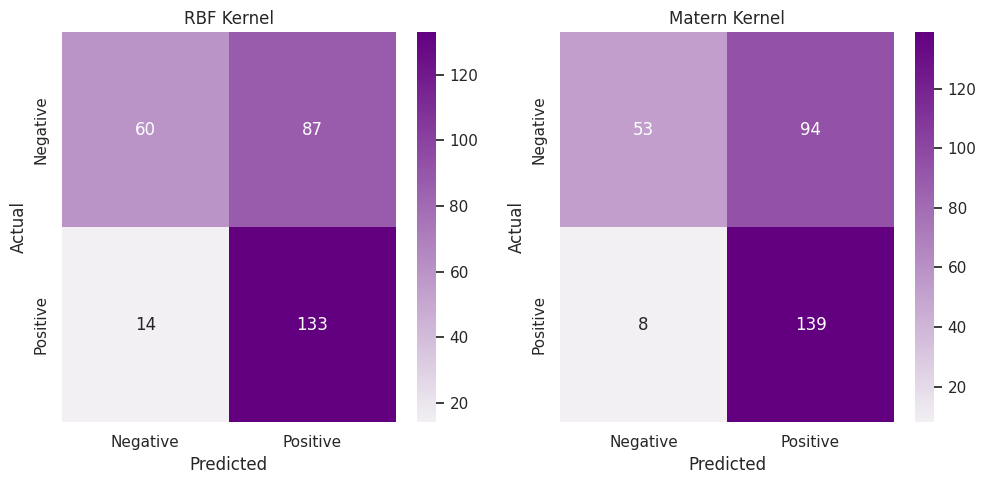

In [19]:
plot_confusion_matrices_from_evaluation(evaluation, cmap=gradient_palette)